In [72]:
import pandas as pd
import numpy as np
import itertools

#carbon_footprint = pd.read_excel("D:/kerja/asisten riset/code rev/all_sources_concat_5years_rice.xlsx") #level origin
carbon_footprint = pd.read_excel("X:/cadlan/stream_2/Step6/CF_clean_sesuai_v2.xlsx") #level origin
# df2 = pd.read_csv("X:/cadlan/stream_2/Step4/REV_fao_stat_production_mov_average_v2_REGION.csv") #level negara
country_code = pd.read_excel("Z:/achaidir/Country Grids/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")

areaharvested = pd.read_excel("X:/cadlan/stream_2/Step4/REV_fao_stat_area_harvested_mov_average_REGION.xlsx")
production = pd.read_excel("X:/cadlan/stream_2/Step4/REV_fao_stat_production_mov_average_v2_REGION.xlsx")

areaharvested = areaharvested.rename(columns={"FAO Production": "Fao Area Harvested"})

In [73]:
# yield_raw (ton/ ha)

yield_raw = production.copy()
for region, time, ngfbfc in zip(yield_raw["IMAGE Region Name"].to_list(), yield_raw["time"].to_list(), yield_raw["NGFBFC"].to_list()):
    try:
        data1 = areaharvested[(areaharvested['IMAGE Region Name'] == region) & (areaharvested['time'] == time) & (areaharvested['NGFBFC'] == ngfbfc)]['Fao Area Harvested'].to_numpy()
        data2 = production[(production['IMAGE Region Name'] == region) & (production['time'] == time) & (production['NGFBFC'] == ngfbfc)]['FAO Production'].to_numpy()
        if data1.size == 0:
            data1 = [0]
        if data2.size == 0: 
            data2 = [0]
        mask = yield_raw[(yield_raw['IMAGE Region Name'] == region) & (yield_raw['time'] == time) & (yield_raw['NGFBFC'] == ngfbfc)].index
        yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]

    except (KeyError, ZeroDivisionError) as e:
        print(f"Error: {e} for region {region}")

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\1851541159.py:13: RuntimeWarning: invalid value encountered in scalar divide
  yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\1851541159.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  yield_raw.loc[mask, 'value'] =  data2[0] / data1[0]


In [74]:
palette = {
   
   'Indonesia region - palm oil' : "#FC4100",
   'Southeast asia - palm oil' : "#FC4100",
   # 'Western africa - palm oil' : "#FC4100",

   'Indonesia region - other non-food & luxury & spices' : "#7AB2B2",
   'Southeast asia - other non-food & luxury & spices' : "#7AB2B2",
   # 'Brazil - other non-food & luxury & spices' : "#7AB2B2",

   'China region - maize' : "#FFF455",
   'Brazil - maize' : "#FFF455",
   # 'Southeast asia - maize' : "#FFF455",
   # 'USA - maize' : "#FFF455",

   'China region - plant based fibres' : "#4D869C",
   'Brazil - plant based fibres' : "#4D869C",
   # 'Indonesia region - plant based fibres' : "#4D869C",

   # 'Indonesia region - pulses' : "#F7418F",
   'eastern africa - pulses' : "#F7418F",
   'Brazil - pulses' : "#F7418F",

   'Rest of south asia - rice' : "#E4E0E1",
   'Southeast asia - rice': "#E4E0E1", 
   # 'China region - rice': "#E4E0E1", 

   'Brazil - soybeans': "#5F6F52",
   'Rest of south america - soybeans': "#5F6F52",
   # 'Indonesia region - soybeans': "#5F6F52",  

   #'Western europe - sugar crops' : "#FFC55A",
   'Brazil - sugar crops' : "#FFC55A",
   'Indonesia region - sugar crops' : "#FFC55A",
   # 'Southeast asia - sugar crops' : "#FFC55A",

   'Russia region - temperate cereals' : "#FC819E",
   'Western europe - temperate cereals' : "#FC819E",
   # 'Ukraine region - temperate cereals' : "#FC819E",

   'China region - temperate oil crops' : "#68D2E8",
   'Western europe - temperate oil crops' : "#68D2E8",
   # 'Southeast asia - temperate oil crops' : "#68D2E8",
   
   'China region - temperate roots & tubers' : "#D2649A",
   'Indonesia region - temperate roots & tubers' : "#D2649A",
   # 'Southeast asia - temperate roots & tubers' : "#D2649A",

   'Western africa - tropical cereals' : "#F7418F",
   'Eastern africa - tropical cereals' : "#F7418F",
   # 'Indonesia region - tropical cereals' : "#F7418F",
   #'USA - tropical cereals' : "#F7418F",

   'Indonesia region - tropical oil crops' : "#03AED2",
   'China region - tropical oil crops' : "#03AED2",
   # 'Southeast asia - tropical oil crops' : "#03AED2",

   'China region - tropical roots & tubers' : "#8E3E63",
   'Indonesia region - tropical roots & tubers' : "#8E3E63",
   # 'Western africa - tropical roots & tubers' : "#8E3E63",
   
   'China region - vegetables & fruits' : "#A9B388",
   'Indonesia region - vegetables & fruits' : "#A9B388",
   # 'Southeast asia - vegetables & fruits' : "#A9B388", 

   'Russia region - wheat' : "#CDE8E5",
   'China region - wheat' : "#CDE8E5",
   # 'Rest of South Asia - wheat' : "#CDE8E5",

   }
df_pallete = pd.DataFrame(palette.items(), columns=["IMAGE Classification Region", "colors"])
df_pallete['IMAGE Classification Region'] = df_pallete['IMAGE Classification Region'].str.lower()
df_pallete['IMAGE Classification Region'] = df_pallete['IMAGE Classification Region'].str.replace(' - ', '-')
df_pallete

,IMAGE Classification Region,colors
0,indonesia region-palm oil,#FC4100
1,southeast asia-palm oil,#FC4100
2,indonesia region-other non-food & luxury & spices,#7AB2B2
3,southeast asia-other non-food & luxury & spices,#7AB2B2
4,china region-maize,#FFF455
5,brazil-maize,#FFF455
6,china region-plant based fibres,#4D869C
7,brazil-plant based fibres,#4D869C
8,eastern africa-pulses,#F7418F
9,brazil-pulses,#F7418F


In [75]:
# yield_raw_copy = yield_raw.copy()
# yield_raw_copy = yield_raw_copy.drop(columns=['FAO Production'])
# yield_raw_copy = yield_raw_copy[yield_raw_copy['time'] != 1970]
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.lower()
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("tropical roots and tubers", "tropical roots & tubers")
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("vegetables or fruits", "vegetables & fruits")
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("other temperate cereals", "temperate cereals")
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("temperate roots and tubers", "temperate roots & tubers")
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("plant-based fibers", "plant based fibres")
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("oil & palm fruit", "palm oil")
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("other non-food & luxury & spices", "non food, luxury, spices")

# yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
# yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
# yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
# yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
# yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
# yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].str.lower()
# yield_raw_copy.rename(columns={'time': 'Year'}, inplace=True)
# # yield_raw_copy = yield_raw_copy.drop(columns=['IMAGE Region Name', 'NGFBFC'])
# yield_raw_copy['value'] = yield_raw_copy['value'].fillna(0.0)
# yield_raw_copy
# yield_FAO = yield_raw_copy[['Year', 'IMAGE Region Name', 'NGFBFC', 'value']]
# yield_FAO
# yield_FAO_average = yield_FAO.groupby(['IMAGE Region Name', 'NGFBFC']).mean().reset_index()
# yield_FAO_average = yield_FAO_average[['IMAGE Region Name', 'NGFBFC', 'value']]
# yield_FAO_average.to_excel("X:/cadlan/stream_2/Step6/yield_average_v3.xlsx", index=False)

In [76]:
# yield_raw.to_excel("X:/cadlan/stream_2/Step6/yield_raw.xlsx", index=False)

In [77]:
filtered_df = yield_raw[(yield_raw['IMAGE Region Name'] == 'W. Europe') & (yield_raw['NGFBFC'] == 'Other temperate cereals')]
filtered_df

,IMAGE Region Name,time,NGFBFC,FAO Production,value
4116,W. Europe,1970,Other temperate cereals,6.314524e+07,2.925903
4131,W. Europe,1975,Other temperate cereals,6.784052e+07,3.062537
4146,W. Europe,1980,Other temperate cereals,7.443107e+07,3.361730
4161,W. Europe,1985,Other temperate cereals,7.557804e+07,3.680003
4176,W. Europe,1990,Other temperate cereals,7.045102e+07,3.848906
4191,W. Europe,1995,Other temperate cereals,6.451150e+07,4.114840
4206,W. Europe,2000,Other temperate cereals,6.821973e+07,4.411663
4221,W. Europe,2005,Other temperate cereals,6.402089e+07,4.381914
4236,W. Europe,2010,Other temperate cereals,6.400989e+07,4.539005
4251,W. Europe,2015,Other temperate cereals,6.743924e+07,4.873674


In [78]:
yield_raw_copy = yield_raw.copy()
yield_raw_copy = yield_raw_copy.drop(columns=['FAO Production'])
yield_raw_copy = yield_raw_copy[yield_raw_copy['time'] != 1970]
yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.lower()
yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("tropical roots and tubers", "tropical roots & tubers")
yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("vegetables or fruits", "vegetables & fruits")
yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("other temperate cereals", "temperate cereals")
yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("temperate roots and tubers", "temperate roots & tubers")
yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("plant-based fibers", "plant based fibres")
yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("oil & palm fruit", "palm oil")
# yield_raw_copy['NGFBFC'] = yield_raw_copy['NGFBFC'].str.replace("other non-food & luxury & spices", "non food, luxury, spices")

yield_raw_copy['NGFBFC'].unique()

array(['maize', 'palm oil', 'other non-food & luxury & spices',
       'temperate cereals', 'plant based fibres', 'pulses', 'rice',
       'soybeans', 'sugar crops', 'temperate oil crops',
       'temperate roots & tubers', 'tropical cereals',
       'tropical oil crops', 'tropical roots & tubers',
       'vegetables & fruits', 'wheat'], dtype=object)

In [79]:
yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
yield_raw_copy['IMAGE Region Name'] = yield_raw_copy['IMAGE Region Name'].str.lower()
yield_raw_copy['IMAGE Region Name'].unique()

array(['brazil', 'central europe', 'canada', 'china region',
       'eastern africa', 'india', 'indonesia region', 'japan',
       'central asia', 'korea region', 'mexico', 'middle east',
       'northern africa', 'oceania', 'central america',
       'rest of southern africa', 'rest of south america',
       'rest of south asia', 'russia region', 'southeast asia',
       'south africa', 'turkey', 'usa', 'ukraine region',
       'western africa', 'western europe'], dtype=object)

In [80]:
filtered_df = yield_raw_copy[(yield_raw_copy['IMAGE Region Name'] == 'western europe') & (yield_raw_copy['NGFBFC'] == 'temperate cereals')]
filtered_df

,IMAGE Region Name,time,NGFBFC,value
4131,western europe,1975,temperate cereals,3.062537
4146,western europe,1980,temperate cereals,3.361730
4161,western europe,1985,temperate cereals,3.680003
4176,western europe,1990,temperate cereals,3.848906
4191,western europe,1995,temperate cereals,4.114840
4206,western europe,2000,temperate cereals,4.411663
4221,western europe,2005,temperate cereals,4.381914
4236,western europe,2010,temperate cereals,4.539005
4251,western europe,2015,temperate cereals,4.873674
4266,western europe,2020,temperate cereals,4.875299


In [81]:
yield_raw_copy['IMAGE Classification Region'] = yield_raw_copy['IMAGE Region Name'] + "-" + yield_raw_copy['NGFBFC']
yield_raw_copy.rename(columns={'time': 'Year'}, inplace=True)
yield_raw_copy = yield_raw_copy.drop(columns=['IMAGE Region Name', 'NGFBFC'])
yield_raw_copy['value'] = yield_raw_copy['value'].fillna(0.0)
yield_FAO = yield_raw_copy[['Year', 'IMAGE Classification Region', 'value']]
yield_FAO

,Year,IMAGE Classification Region,value
16,1975,brazil-maize,1.541425
17,1975,brazil-palm oil,10.466321
18,1975,brazil-other non-food & luxury & spices,0.665901
19,1975,brazil-temperate cereals,1.021415
20,1975,brazil-plant based fibres,0.530359
...,...,...,...
4274,2020,western europe-tropical cereals,5.578269
4275,2020,western europe-tropical oil crops,0.000000
4276,2020,western europe-tropical roots & tubers,0.000000
4277,2020,western europe-vegetables & fruits,14.366040


In [82]:
# yield_FAO_average = yield_FAO.groupby(['IMAGE Classification Region']).mean().reset_index()
# yield_FAO_average = yield_FAO_average[['IMAGE Classification Region', 'value']]
# yield_FAO_average.to_excel("X:/cadlan/stream_2/Step6/yield_average_v2.xlsx", index=False)

In [83]:
df_pallete['IMAGE Classification Region'].unique()

array(['indonesia region-palm oil', 'southeast asia-palm oil',
       'indonesia region-other non-food & luxury & spices',
       'southeast asia-other non-food & luxury & spices',
       'china region-maize', 'brazil-maize',
       'china region-plant based fibres', 'brazil-plant based fibres',
       'eastern africa-pulses', 'brazil-pulses',
       'rest of south asia-rice', 'southeast asia-rice',
       'brazil-soybeans', 'rest of south america-soybeans',
       'brazil-sugar crops', 'indonesia region-sugar crops',
       'russia region-temperate cereals',
       'western europe-temperate cereals',
       'china region-temperate oil crops',
       'western europe-temperate oil crops',
       'china region-temperate roots & tubers',
       'indonesia region-temperate roots & tubers',
       'western africa-tropical cereals',
       'eastern africa-tropical cereals',
       'indonesia region-tropical oil crops',
       'china region-tropical oil crops',
       'china region-tropical r

In [84]:
filtered_df = yield_FAO[(yield_FAO['IMAGE Classification Region'] == 'western europe-temperate cereals')]
filtered_df

,Year,IMAGE Classification Region,value
4131,1975,western europe-temperate cereals,3.062537
4146,1980,western europe-temperate cereals,3.361730
4161,1985,western europe-temperate cereals,3.680003
4176,1990,western europe-temperate cereals,3.848906
4191,1995,western europe-temperate cereals,4.114840
4206,2000,western europe-temperate cereals,4.411663
4221,2005,western europe-temperate cereals,4.381914
4236,2010,western europe-temperate cereals,4.539005
4251,2015,western europe-temperate cereals,4.873674
4266,2020,western europe-temperate cereals,4.875299


In [85]:
yield_FAO  = yield_FAO[yield_FAO['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
yield_FAO['IMAGE Classification Region'].unique()

array(['brazil-maize', 'brazil-plant based fibres', 'brazil-pulses',
       'brazil-soybeans', 'brazil-sugar crops', 'china region-maize',
       'china region-plant based fibres',
       'china region-temperate oil crops',
       'china region-temperate roots & tubers',
       'china region-tropical oil crops',
       'china region-tropical roots & tubers',
       'china region-vegetables & fruits', 'china region-wheat',
       'eastern africa-pulses', 'eastern africa-tropical cereals',
       'indonesia region-palm oil',
       'indonesia region-other non-food & luxury & spices',
       'indonesia region-sugar crops',
       'indonesia region-temperate roots & tubers',
       'indonesia region-tropical oil crops',
       'indonesia region-tropical roots & tubers',
       'indonesia region-vegetables & fruits',
       'rest of south america-soybeans', 'rest of south asia-rice',
       'russia region-temperate cereals', 'russia region-wheat',
       'southeast asia-palm oil',
       's

In [86]:
yield_FAO_filtered = yield_FAO[yield_FAO['IMAGE Classification Region'].isin(yield_FAO['IMAGE Classification Region'])]
yield_FAO_filtered


,Year,IMAGE Classification Region,value
16,1975,brazil-maize,1.541425
20,1975,brazil-plant based fibres,0.530359
21,1975,brazil-pulses,0.516038
23,1975,brazil-soybeans,1.657372
24,1975,brazil-sugar crops,48.549196
...,...,...,...
4242,2010,western europe-temperate oil crops,2.766284
4251,2015,western europe-temperate cereals,4.873674
4257,2015,western europe-temperate oil crops,2.771320
4266,2020,western europe-temperate cereals,4.875299


In [87]:
# Get unique IMAGE Classification Regions from both DataFrames
unique_pallete = set(df_pallete['IMAGE Classification Region'].unique())
unique_yield_FAO = set(yield_FAO['IMAGE Classification Region'].unique())
# Find the regions that are in df_pallete but not in yield_FAO
missing_regions = unique_pallete - unique_yield_FAO
# Convert the result to a list for easier viewing
missing_regions_list = list(missing_regions)
# Display the missing regions
print("Missing IMAGE Classification Regions:", missing_regions_list)

Missing IMAGE Classification Regions: []


In [88]:
def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0

yield_FAO_average = yield_FAO.groupby(['IMAGE Classification Region'])['value'].apply(custom_mean).to_frame('value')
yield_FAO_average = yield_FAO_average.reset_index()
yield_FAO_average = yield_FAO_average[['IMAGE Classification Region', 'value']]


# yield_FAO_average = yield_FAO.groupby(['IMAGE Classification Region']).mean().reset_index()

# yield_FAO_average = yield_FAO_average[['IMAGE Classification Region', 'value']]
# yield_FAO_average

In [89]:
df2_array_selected = yield_FAO_average['value'].to_numpy()
df2_array_selected

array([ 3.0634685 ,  1.93922745,  0.70638604,  2.29765575, 66.57760426,
        4.62943799,  3.07900796,  1.9086907 , 14.10776323,  1.49211884,
       18.42111066, 15.75460155,  3.70025747,  0.81721343,  1.04855216,
        0.85173329, 17.47780683, 60.40608561, 10.1519203 ,  5.14696457,
       13.34707154,  8.3686981 ,  2.2774003 ,  3.09044639,  1.6516883 ,
        1.92600276,  1.22084226, 17.05437416,  3.04121184,  0.79218756,
        4.11495707,  2.45771315])

In [90]:
carbon_footprint.rename(columns={'NGFBFC': 'type'}, inplace=True)

In [91]:
columns = [x for x in range(1975, 2021, 5)]
carbon_footprint['type'] = carbon_footprint['type'].str.replace("non food, luxury, spices", "other non-food & luxury & spices").replace("oil, palm fruit", "palm oil")
carbon_footprint = carbon_footprint[~carbon_footprint['type'].str.contains("pasture")]
carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].str.lower()
carbon_footprint['IMAGE Classification Region'] = carbon_footprint['IMAGE Region Name'] + "-" + carbon_footprint['type']
carbon_footprint_group = carbon_footprint.groupby(["IMAGE Classification Region"]).sum()
carbon_footprint_group = carbon_footprint_group.reset_index()
carbon_footprint_group.rename(columns={'Mean': 'average'}, inplace=True)
# carbon_footprint_group = carbon_footprint_group.drop(columns=["type", "Unnamed: 0", "emissions", "category", "IMAGE Region Name"])
#membuat average lintas tahun
# carbon_footprint_group['average'] = carbon_footprint_group.iloc[:, 1:].mean(axis=1)


C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\1534016917.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  carbon_footprint_group = carbon_footprint.groupby(["IMAGE Classification Region"]).sum()


In [92]:
# carbon_footprint_group['average'] = carbon_footprint_group.iloc[:, 1:].replace(0, pd.NA).mean(axis=1, skipna=True)
# pd.set_option('future.no_silent_downcasting', True)
carbon_footprint_group['average'] = carbon_footprint_group['average'].fillna(0)
carbon_footprint_group = carbon_footprint_group[['IMAGE Classification Region', 'average']]

carbon_footprint_array = carbon_footprint_group['average'].to_numpy()
carbon_footprint_group_sorted = carbon_footprint_group.sort_values(by='average', ascending=False)

#selected crop-region
carbon_footprint_  = carbon_footprint_group[carbon_footprint_group['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]

#membuat data array untuk yg selected saja
carbon_footprint_array_selected = carbon_footprint_['average'].to_numpy()

#attach colour
carbon_footprint_ = pd.merge(left=carbon_footprint_, right=df_pallete, left_on="IMAGE Classification Region", right_on="IMAGE Classification Region", how="left")

In [93]:
len(carbon_footprint_)

32

In [94]:
# Get unique IMAGE Classification Regions from both DataFrames
unique_pallete = set(df_pallete['IMAGE Classification Region'].unique())
unique_carbon_footprint_group = set(carbon_footprint_group['IMAGE Classification Region'].unique())
# Find the regions that are in df_pallete but not in yield_FAO
missing_regions = unique_pallete - unique_carbon_footprint_group
# Convert the result to a list for easier viewing
missing_regions_list = list(missing_regions)
# Display the missing regions
print("Missing IMAGE Classification Regions:", missing_regions_list)

Missing IMAGE Classification Regions: []


In [95]:
carbon_footprint_array_selected

array([ 4.95489389,  4.6625395 ,  3.45703033,  5.79773765,  4.01634955,
        1.49701463,  1.25392871,  2.00288072,  1.06720548,  1.97234236,
        3.03193915,  2.12636252,  1.00549374,  4.70703278,  2.9190724 ,
       17.84049441, 20.38668175,  2.93936338,  6.05828164, 15.54968903,
       11.60881359, 11.3002799 ,  3.39030084,  5.7916934 ,  0.34366735,
        0.58256089,  8.21217392, 11.92154403,  4.62520774,  1.50717714,
        0.46950607,  0.58306764])

In [96]:
yield_FAO.head(150)

,Year,IMAGE Classification Region,value
16,1975,brazil-maize,1.541425
20,1975,brazil-plant based fibres,0.530359
21,1975,brazil-pulses,0.516038
23,1975,brazil-soybeans,1.657372
24,1975,brazil-sugar crops,48.549196
...,...,...,...
777,2010,eastern africa-tropical cereals,1.192766
787,2015,eastern africa-pulses,1.094072
793,2015,eastern africa-tropical cereals,0.920921
803,2020,eastern africa-pulses,1.148049


In [97]:
# Fill values in df_new based on yield_FAO
years = [x for x in range(1975, 2021, 5)]
crops = [x for x in carbon_footprint_group['IMAGE Classification Region'].unique()]
combinations = list(itertools.product(years, crops))

df_new = pd.DataFrame(combinations, columns=['Year', 'IMAGE Classification Region'])
df_new["value"] = 0.0

df_new_copy2 = df_new.copy()
df_new_copy2 = df_new_copy2.merge(yield_FAO, how='left', left_on=['Year', 'IMAGE Classification Region'], right_on=['Year', 'IMAGE Classification Region'])
df_new_copy2['value'] = df_new_copy2['value_y'].fillna(0.0)
df_new_copy2 = df_new_copy2.drop(columns=['value_y', 'value_x'])
df_new_copy2 = pd.pivot_table(data=df_new_copy2, columns="Year", index=["IMAGE Classification Region"], values="value").reset_index()

df_new_copy2['average'] = df_new_copy2.iloc[:, 1:].mean(axis=1)
# df_new_copy2['average'] = df_new_copy2.iloc[:, 1:].replace(0, pd.NA).mean(axis=1, skipna=True)
df_new_copy2['average'] = df_new_copy2['average'].fillna(0)
df_new_copy2 = df_new_copy2[['IMAGE Classification Region', 'average']]
df_2_sort = df_new_copy2.sort_values(by='average', ascending=False)
df2_array = df_new_copy2['average'].to_numpy()

#selected crop-region
df2_isin = df_new_copy2[df_new_copy2['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
df2_isin
#membuat data array untuk yg selected saja
df2_array_selected = df2_isin['average'].to_numpy()

# #attach colour
df2_colour = pd.merge(left=df2_isin, right=df_pallete, left_on="IMAGE Classification Region", right_on="IMAGE Classification Region", how="right")
df2_colour = df2_colour.sort_values(by='IMAGE Classification Region', ascending=True)
df2_colour

,IMAGE Classification Region,average,colors
5,brazil-maize,3.063469,#FFF455
7,brazil-plant based fibres,1.939227,#4D869C
9,brazil-pulses,0.706386,#F7418F
12,brazil-soybeans,2.297656,#5F6F52
14,brazil-sugar crops,66.577604,#FFC55A
4,china region-maize,4.629438,#FFF455
6,china region-plant based fibres,3.079008,#4D869C
18,china region-temperate oil crops,1.908691,#68D2E8
20,china region-temperate roots & tubers,14.107763,#D2649A
25,china region-tropical oil crops,1.492119,#03AED2


In [98]:
filtered_df = yield_FAO[(yield_FAO['IMAGE Classification Region'] == 'indonesia region-other non-food & luxury & spices')]
filtered_df

,Year,IMAGE Classification Region,value
995,1975,indonesia region-other non-food & luxury & spices,0.636762
1009,1980,indonesia region-other non-food & luxury & spices,0.655963
1023,1985,indonesia region-other non-food & luxury & spices,0.690633
1037,1990,indonesia region-other non-food & luxury & spices,0.805501
1051,1995,indonesia region-other non-food & luxury & spices,0.908715
1065,2000,indonesia region-other non-food & luxury & spices,0.868944
1079,2005,indonesia region-other non-food & luxury & spices,0.965769
1093,2010,indonesia region-other non-food & luxury & spices,0.908265
1107,2015,indonesia region-other non-food & luxury & spices,0.985804
1121,2020,indonesia region-other non-food & luxury & spices,1.090976


In [99]:
# total_emissions = five_top_data.groupby(['IMAGE Region Name', 'type'])['value'].sum().reset_index()
# total_emissions.columns = ['IMAGE Region Name', 'type', 'total_akumulatif']
# five_top_data = five_top_data.merge(total_emissions, on=['IMAGE Region Name', 'type'])
# five_top_data['percentage'] = (five_top_data['value'] / five_top_data['total_akumulatif']) * 100
# pivot_df = five_top_data.pivot_table(index=['IMAGE Region Name', 'type'], columns='emissions', values='percentage', fill_value=0)
# bar_width = 0.6

In [100]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.figure(figsize=(25, 10), dpi=400)

# total_emissions = ((carbon_footprint_array*1e3)/5).flatten()
# total_emissions_selected = ((carbon_footprint_array_selected*1e3)/5).flatten()  

# yields = (df2_array).flatten()
# yields_selected = (df2_array_selected).flatten()

# land_effeciency = 1 / yields
# land_effeciency_selected = 1 / yields

# n_points = 100
# carbon_footprint_countour = np.linspace(np.min(total_emissions), np.max(total_emissions_selected)+10, n_points) 
# df2_countur = np.linspace(0, np.max(yields_selected)+2, n_points)
# # df2_countur = np.linspace(np.min(land_effeciency), np.max(land_effeciency_selected)+0.1, n_points)

# X, Y = np.meshgrid(carbon_footprint_countour , df2_countur)
# Z = X / Y  # z = total emissions / yield = emissions per hectare

# # Plot
# plt.figure(figsize=(8, 6))
# contour = plt.contourf(X, Y, Z, levels=10, cmap='Greys')
# cbar = plt.colorbar(contour)
# # cbar.set_label('Emissions per Hectare (t CO₂-eq/ha)')

# # Add labels and title
# plt.xlabel('Average annual emissions (MtCO₂-eq/ year)')
# plt.ylabel('Yields (ton/ha)')

# # plt.scatter(total_emissions, yields, color='grey', edgecolor='black', label='others')
# # plt.scatter(total_emissions, yields, color='grey', edgecolor='black', label='others')

# for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['colors'].to_list())):
#     plt.scatter(total_emissions_selected[x], yields_selected[x], color=data[1], label=data[0])
#     # plt.scatter(total_emissions_selected[x], land_effeciency_selected[x], color=data[1], label=data[0])

# plt.legend(loc='lower left', bbox_to_anchor= (1.25, 0.35), ncol=1, prop={'size': 9})

# plt.show()

In [101]:
#analisis 1
production_copy = production.copy()
production_copy['IMAGE Region Name'] = production_copy['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
production_copy['IMAGE Region Name'] = production_copy['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
production_copy['IMAGE Region Name'] = production_copy['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
production_copy['IMAGE Region Name'] = production_copy['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
production_copy['IMAGE Region Name'] = production_copy['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
production_copy['IMAGE Region Name'] = production_copy['IMAGE Region Name'].str.lower()
production_copy['IMAGE Region Name'].unique()

array(['brazil', 'central europe', 'canada', 'china region',
       'eastern africa', 'india', 'indonesia region', 'japan',
       'central asia', 'korea region', 'mexico', 'middle east',
       'northern africa', 'oceania', 'central america',
       'rest of southern africa', 'rest of south america',
       'rest of south asia', 'russia region', 'southeast asia',
       'south africa', 'turkey', 'usa', 'ukraine region',
       'western africa', 'western europe'], dtype=object)

In [102]:
production_copy['NGFBFC'] = production_copy['NGFBFC'].str.lower()
production_copy['NGFBFC'].unique()

array(['maize', 'oil & palm fruit', 'other non-food & luxury & spices',
       'other temperate cereals', 'plant based fibres', 'pulses', 'rice',
       'soybeans', 'sugar crops', 'temperate oil crops',
       'temperate roots & tubers', 'tropical cereals',
       'tropical oil crops', 'tropical roots & tubers',
       'vegetables & fruits', 'wheat'], dtype=object)

In [103]:
production_copy['NGFBFC'] = production_copy['NGFBFC'].str.lower()
production_copy['NGFBFC'] = production_copy['NGFBFC'].str.replace('oil & palm fruit', 'palm oil')
production_copy['NGFBFC'] = production_copy['NGFBFC'].str.replace('other non-food & luxury & spices', 'other non-food & luxury & spices')
production_copy['NGFBFC'] = production_copy['NGFBFC'].str.replace('other temperate cereals', 'temperate cereals')
production_copy['NGFBFC'].unique()

array(['maize', 'palm oil', 'other non-food & luxury & spices',
       'temperate cereals', 'plant based fibres', 'pulses', 'rice',
       'soybeans', 'sugar crops', 'temperate oil crops',
       'temperate roots & tubers', 'tropical cereals',
       'tropical oil crops', 'tropical roots & tubers',
       'vegetables & fruits', 'wheat'], dtype=object)

In [104]:
production_copy['IMAGE Classification Region'] = production_copy['IMAGE Region Name'] + "-" + production_copy['NGFBFC']
production_copy = production_copy.drop(columns=['IMAGE Region Name', 'NGFBFC'])
production_copy


,time,FAO Production,IMAGE Classification Region
0,1970,1.374886e+07,brazil-maize
1,1970,3.700000e+04,brazil-palm oil
2,1970,1.887903e+06,brazil-other non-food & luxury & spices
3,1970,8.169200e+04,brazil-temperate cereals
4,1970,2.395394e+06,brazil-plant based fibres
...,...,...,...
4274,2020,7.002724e+05,western europe-tropical cereals
4275,2020,0.000000e+00,western europe-tropical oil crops
4276,2020,0.000000e+00,western europe-tropical roots & tubers
4277,2020,9.706803e+07,western europe-vegetables & fruits


In [105]:
# production_copy = pd.pivot_table(data=production_copy, columns="time", index=["IMAGE Classification Region"], values="FAO Production").reset_index()

def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0

production_copy = production_copy.groupby(['IMAGE Classification Region'])['FAO Production'].apply(custom_mean).to_frame('average')
production_copy = production_copy.reset_index()
production_copy
# # production_copy = production_copy[['IMAGE Classification Region', 'value']]
# # production_copy



# production_copy = production_copy.groupby(['IMAGE Classification Region']).mean()
# production_copy = production_copy.reset_index()



,IMAGE Classification Region,average
0,brazil-maize,4.035916e+07
1,brazil-other non-food & luxury & spices,3.367920e+06
2,brazil-palm oil,7.760761e+05
3,brazil-plant based fibres,3.055051e+06
4,brazil-pulses,2.726315e+06
...,...,...
384,western europe-tropical cereals,5.711889e+05
385,western europe-tropical oil crops,1.877114e+03
386,western europe-tropical roots & tubers,9.337003e+04
387,western europe-vegetables & fruits,9.765910e+07


In [106]:
df_norm = production_copy.copy()
# df_norm['average'] = df_norm.iloc[:, 1:].mean(axis=1, skipna=True)
df_norm = df_norm[['IMAGE Classification Region', 'average']]
df_norm_selected = df_norm[df_norm['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]
df_norm_selected

,IMAGE Classification Region,average
0,brazil-maize,4.035916e+07
3,brazil-plant based fibres,3.055051e+06
4,brazil-pulses,2.726315e+06
6,brazil-soybeans,4.121350e+07
7,brazil-sugar crops,3.747185e+08
72,china region-maize,1.234318e+08
75,china region-plant based fibres,1.422790e+07
81,china region-temperate oil crops,2.105979e+07
82,china region-temperate roots & tubers,5.171543e+07
84,china region-tropical oil crops,1.214673e+06


In [107]:
df_norm_selected

,IMAGE Classification Region,average
0,brazil-maize,4.035916e+07
3,brazil-plant based fibres,3.055051e+06
4,brazil-pulses,2.726315e+06
6,brazil-soybeans,4.121350e+07
7,brazil-sugar crops,3.747185e+08
72,china region-maize,1.234318e+08
75,china region-plant based fibres,1.422790e+07
81,china region-temperate oil crops,2.105979e+07
82,china region-temperate roots & tubers,5.171543e+07
84,china region-tropical oil crops,1.214673e+06


In [108]:
df_norm_selected_test = df_norm_selected['average'].to_numpy()/1e7
df_norm_selected_test * 60

array([ 242.15497353,   18.33030706,   16.35788891,  247.28099607,
       2248.3112172 ,  740.59071158,   85.36741   ,  126.35874426,
        310.29256222,    7.28803857,  607.00228733, 1992.09258049,
        549.08807797,   21.05577928,   30.18569749,   27.54042412,
        404.84181766,  146.52953076,    8.74447497,   85.30262588,
        116.12562523,  103.35798221,  162.32429534,  279.1495041 ,
        287.53505822,  405.79546805,   37.83168238,  315.92592001,
        535.68038597,  119.57930945,  407.38304699,  118.97626651])

In [109]:
len(df_norm_selected)

32

In [110]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm_selected['norm_average'] = scaler.fit_transform(df_norm_selected['average'].to_numpy().reshape(-1, 1)).flatten()

df_norm_selected['norm_average'] =(df_norm_selected['average']/df_norm_selected['average'].max())*100
df_norm_selected = df_norm_selected.drop(columns=['average'])
df_norm_selected_arr = df_norm_selected['norm_average'].to_numpy()
df_norm_selected_arr

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\3648482216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm_selected['norm_average'] = scaler.fit_transform(df_norm_selected['average'].to_numpy().reshape(-1, 1)).flatten()
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\3648482216.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm_selected['norm_average'] =(df_norm_selected['average']/df_norm_selected['average'].max())*100


array([ 10.7705273 ,   0.81529225,   0.72756337,  10.99852165,
       100.        ,  32.93986642,   3.79695699,   5.62016252,
        13.80113927,   0.32415613,  26.99814344,  88.6039515 ,
        24.42224518,   0.93651533,   1.34259427,   1.22493825,
        18.0064848 ,   6.51731529,   0.38893525,   3.79407554,
         5.16501561,   4.59713857,   7.21983212,  12.41596368,
        12.78893491,  18.0489011 ,   1.68267107,  14.05169879,
        23.82590016,   5.31862798,  18.11951316,   5.29180594])

In [111]:
# columns = [x for x in range(1975, 2021, 5)]
# carbon_footprint['type'] = carbon_footprint['type'].str.replace("non food, luxury, spices", "other non-food, luxury, spices").replace("oil, palm fruit", "palm oil")
# carbon_footprint = carbon_footprint[~carbon_footprint['type'].str.contains("pasture")]
# carbon_footprint['IMAGE Region Name'] = carbon_footprint['IMAGE Region Name'].str.lower()
# carbon_footprint['IMAGE Classification Region'] = carbon_footprint['IMAGE Region Name'] + "-" + carbon_footprint['type']
# carbon_footprint_group = carbon_footprint.groupby(["IMAGE Classification Region"]).sum()
# carbon_footprint_group = carbon_footprint_group.reset_index()
# # carbon_footprint_group = carbon_footprint_group.drop(columns=["type", "Unnamed: 0", "emissions", "category", "IMAGE Region Name"])

# #membuat average lintas tahun
# # carbon_footprint_group['average'] = carbon_footprint_group.iloc[:, 1:].mean(axis=1)
# carbon_footprint_group['average'] = carbon_footprint_group.iloc[:, 1:].replace(0, pd.NA).mean(axis=1, skipna=True)
# pd.set_option('future.no_silent_downcasting', True)
# carbon_footprint_group['average'] = carbon_footprint_group['average'].fillna(0)
# carbon_footprint_group = carbon_footprint_group[['IMAGE Classification Region', 'average']]

# carbon_footprint_array = carbon_footprint_group['average'].to_numpy()

# carbon_footprint_group_sorted = carbon_footprint_group.sort_values(by='average', ascending=False)

# #selected crop-region
# carbon_footprint_  = carbon_footprint_group[carbon_footprint_group['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]

# #membuat data array untuk yg selected saja
# carbon_footprint_array_selected = carbon_footprint_['average'].to_numpy()

# #attach colour
# carbon_footprint_ = pd.merge(left=carbon_footprint_, right=df_pallete, left_on="IMAGE Classification Region", right_on="IMAGE Classification Region", how="left")

In [112]:
#size params

size_params = pd.read_excel("X:/cadlan/stream_2/Step6/all_sources_concat_5years_rice_13 Jan_v4_25_minus&Tahunan.xlsx") #level origin
carbon_footprint_copy = size_params.copy()
carbon_footprint_copy = carbon_footprint_copy.drop(columns=['Unnamed: 0', 'emissions'])
carbon_footprint_copy = carbon_footprint_copy.rename(columns={"type" : "NGFBFC"})
carbon_footprint_copy['IMAGE Region Name'] = carbon_footprint_copy['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
carbon_footprint_copy['IMAGE Region Name'] = carbon_footprint_copy['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
carbon_footprint_copy['IMAGE Region Name'] = carbon_footprint_copy['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
carbon_footprint_copy['IMAGE Region Name'] = carbon_footprint_copy['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
carbon_footprint_copy['IMAGE Region Name'] = carbon_footprint_copy['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
carbon_footprint_copy['IMAGE Region Name'] = carbon_footprint_copy['IMAGE Region Name'].str.lower()
carbon_footprint_copy['NGFBFC'] = carbon_footprint_copy['NGFBFC'].str.lower()
carbon_footprint_copy['IMAGE Classification Region'] = carbon_footprint_copy['IMAGE Region Name'] + "-" + carbon_footprint_copy['NGFBFC']
carbon_footprint_copy = carbon_footprint_copy.drop(columns=['NGFBFC', 'IMAGE Region Name']) 
carbon_footprint_copy = carbon_footprint_copy.groupby(['category', 'IMAGE Classification Region']).sum()
carbon_footprint_copy = carbon_footprint_copy.reset_index()
carbon_footprint_copy2 = carbon_footprint_copy.copy()
carbon_footprint_copy2['average'] = carbon_footprint_copy2.iloc[:, 2:].mean(axis=1, skipna=True)
carbon_footprint_copy2 = carbon_footprint_copy2[['category', 'IMAGE Classification Region', 'average']]
carbon_footprint_copy2 = carbon_footprint_copy2.fillna(0)
carbon_footprint_copy2


,category,IMAGE Classification Region,average
0,AGRI,brazil-maize,2.715315e-03
1,AGRI,"brazil-non food, luxury, spices",8.051866e-04
2,AGRI,brazil-palm oil,2.490465e-05
3,AGRI,brazil-pasture,5.880312e-03
4,AGRI,brazil-plant based fibres,3.944619e-04
...,...,...,...
879,LUC,western europe-tropical cereals,9.872712e-05
880,LUC,western europe-tropical oil crops,5.942099e-07
881,LUC,western europe-tropical roots & tubers,3.251291e-07
882,LUC,western europe-vegetables & fruits,3.172932e-04


In [113]:
# five_top_data
# five_top_arr = five_top_data[five_top_data.columns[1:]].to_numpy()
# five_top_arr

In [114]:
def calculate_percentage(row):
    try:
        return (row['average'] / row['total_akumulatif']) * 100
    except ZeroDivisionError:
        return 0
    
total_emissions = carbon_footprint_copy2.groupby(['IMAGE Classification Region'])['average'].sum().reset_index()
total_emissions = total_emissions.rename(columns={'average':'total_akumulatif'})
five_top_data = carbon_footprint_copy2.merge(total_emissions, on=['IMAGE Classification Region'])
five_top_data['percentage'] = five_top_data.apply(calculate_percentage, axis=1)
five_top_data = five_top_data[five_top_data['IMAGE Classification Region'].isin(df_pallete['IMAGE Classification Region'])]

five_top_data = pd.pivot_table(data=five_top_data, columns="category", index=["IMAGE Classification Region"], values="percentage").reset_index()
five_top_arr = five_top_data[five_top_data.columns[1:]].to_numpy()
five_top_arr

array([[ 3.72878907, 96.27121093],
       [ 3.30113676, 96.69886324],
       [ 3.61222961, 96.38777039],
       [ 4.15214065, 95.84785935],
       [18.51469415, 81.48530585],
       [70.14938406, 29.85061594],
       [34.03133396, 65.96866604],
       [21.66095179, 78.33904821],
       [65.75700245, 34.24299755],
       [26.26490858, 73.73509142],
       [30.1583177 , 69.8416823 ],
       [33.3016692 , 66.6983308 ],
       [54.83069626, 45.16930374],
       [30.99488142, 69.00511858],
       [ 5.824827  , 94.175173  ],
       [40.79084353, 59.20915647],
       [94.56121955,  5.43878045],
       [97.13321544,  2.86678456],
       [42.85443491, 57.14556509],
       [57.48426813, 42.51573187],
       [30.71991403, 69.28008597],
       [ 9.91395695, 90.08604305],
       [62.35359515, 37.64640485],
       [37.95995116, 62.04004884],
       [46.62098738, 53.37901262],
       [49.34821587, 50.65178413],
       [76.75540649, 23.24459351],
       [ 1.83235489, 98.16764511],
       [94.52408802,

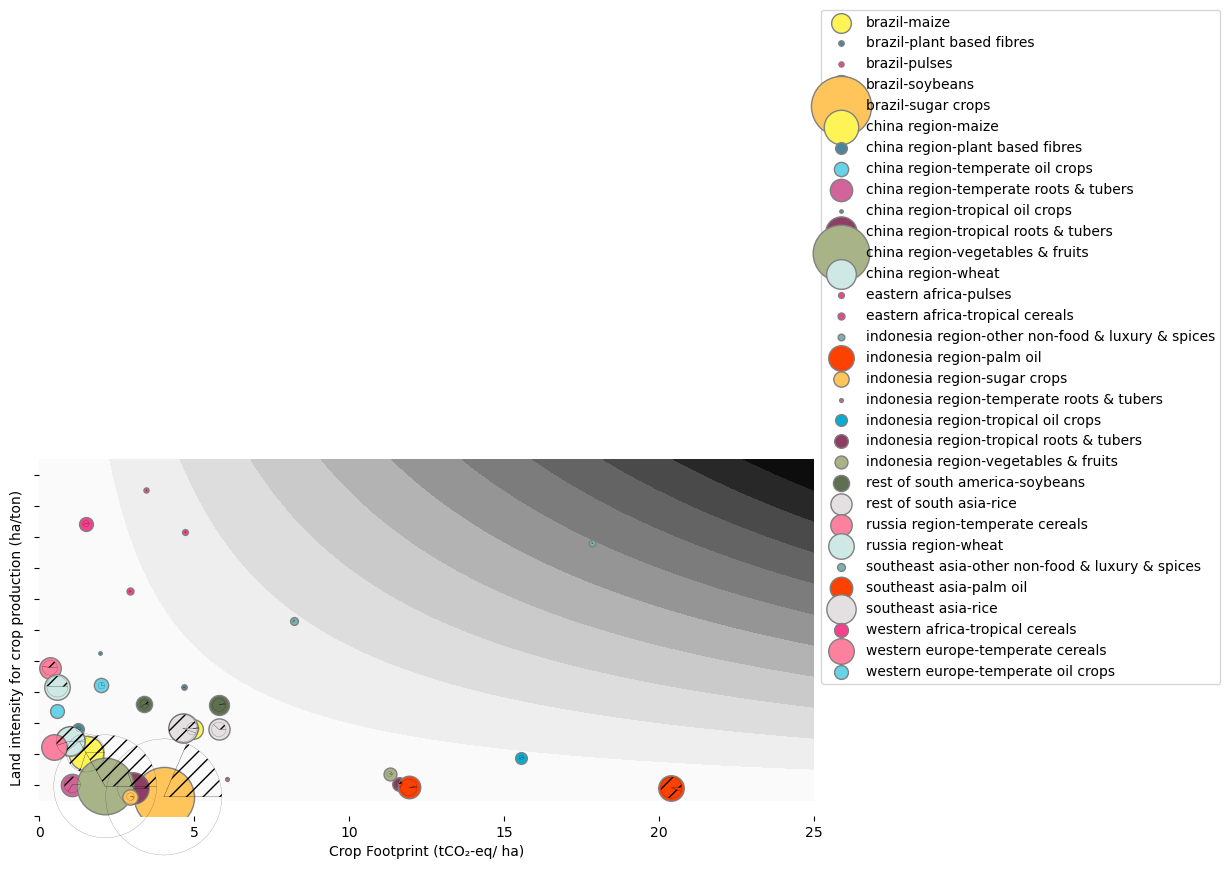

In [115]:
import numpy as np
import matplotlib.pyplot as plt

crop_footprint_selected = carbon_footprint_array_selected
# yields = df2_array.flatten()
yields_selected = df2_array_selected

# land_effeciency = 1 / yields
# land_effeciency[np.isinf(land_effeciency)] = 0
land_effeciency_selected = 1 / yields_selected

carbon_footprint_contour = np.linspace(0, 25)
df2_contour = np.linspace(0, 11)

# Create a meshgrid for contour plotting
X, Y = np.meshgrid(carbon_footprint_contour, df2_contour)
Z = X * Y  # The Z value (emissions per hectare)

# Plot
plt.figure(figsize=(10, 8))

manual_levels = [-1.0, -0.5, 0.0, 0.5, 1.0]
contour = plt.contourf(X, Y, Z, levels=11, cmap='Greys')
# cbar = plt.colorbar(contour)
# cbar.set_label('Emissions per Hectare (t CO₂-eq/ha)')
# contour_lines = plt.contour(X, Y, Z, levels=11, colors='black', linewidths=0.1)

# Add labels and title
plt.xlabel('Crop Footprint (tCO₂-eq/ ha)')
plt.ylabel('Land intensity for crop production (ha/ton)')

# Example regions with pie charts
transparent_white = (1, 1, 1, 0)
pie_colors = [transparent_white, transparent_white]

regions = df2_colour['IMAGE Classification Region'].to_list()
colors = df2_colour['colors'].to_list()
hatch_patterns = ['/', '\\']
norm_y = (land_effeciency_selected / land_effeciency_selected.max() * 10)

scaling_factor_scatter = 1e-5  # Scale for scatter points
scaling_factor_pie = 1e-7

for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['colors'].to_list())):
    sizes_plot = df_norm_selected_test[x]*50
    plt.scatter(crop_footprint_selected[x], norm_y[x], color=data[1], edgecolors='Grey', label=data[0], s=sizes_plot)

for x, data in enumerate(zip(regions, colors, five_top_arr)):
    center_x = crop_footprint_selected[x]
    center_y = norm_y[x]
    sizes_pie = df_norm_selected_test[x]/20

    pie_wedge_collection, _ = plt.gca().pie(
        x=data[2], colors=pie_colors, radius=sizes_pie, center=(center_x, center_y)
    )

    # Add hatch to the first wedge of the pie chart
    for i, wedge in enumerate(pie_wedge_collection):
        wedge.set_edgecolor('black')
        wedge.set_linewidth(0.1)
        if i == 0:  # First category
            wedge.set_hatch('//')  # Apply the hatch pattern
    
plt.xlim(0, 25)
plt.ylim(0, 11)

plt.xticks(np.arange(0, 26, 5))  # Ticks from 0 to 25 with a step of 5
plt.yticks(np.arange(-0.5, 11, 1), [])  

plt.legend(loc='lower left', bbox_to_anchor=(1.00, 0.35), ncol=1)
plt.show()

In [116]:
for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['colors'].to_list())):
    print(data)

('brazil-maize', '#FFF455')
('brazil-plant based fibres', '#4D869C')
('brazil-pulses', '#F7418F')
('brazil-soybeans', '#5F6F52')
('brazil-sugar crops', '#FFC55A')
('china region-maize', '#FFF455')
('china region-plant based fibres', '#4D869C')
('china region-temperate oil crops', '#68D2E8')
('china region-temperate roots & tubers', '#D2649A')
('china region-tropical oil crops', '#03AED2')
('china region-tropical roots & tubers', '#8E3E63')
('china region-vegetables & fruits', '#A9B388')
('china region-wheat', '#CDE8E5')
('eastern africa-pulses', '#F7418F')
('eastern africa-tropical cereals', '#F7418F')
('indonesia region-other non-food & luxury & spices', '#7AB2B2')
('indonesia region-palm oil', '#FC4100')
('indonesia region-sugar crops', '#FFC55A')
('indonesia region-temperate roots & tubers', '#D2649A')
('indonesia region-tropical oil crops', '#03AED2')
('indonesia region-tropical roots & tubers', '#8E3E63')
('indonesia region-vegetables & fruits', '#A9B388')
('rest of south america-

In [117]:
REG3besar = ['BRA', 'BRA','BRA','BRA','BRA','BRA',
        'CHN', 'CHN', 'CHN', 'CHN', 'CHN', 'CHN','CHN', 'CHN',
        'EAF','EAF','EAF',
        'IDN','IDN','IDN','IDN','IDN','IDN','IDN','IDN','IDN','IDN','IDN',
        'RSAM', 'RSAS', 'RSAS',
        'RUS', 'RUS',
        'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA', 'SEA',
        'UKR', 'WAF','WAF','WAF',
        'WEU', 'WEU']

REG2besar = ['BRA', 'BRA','BRA','BRA','BRA',
        'CHN', 'CHN', 'CHN', 'CHN', 'CHN', 'CHN','CHN', 'CHN',
        'EAF','EAF',
        'IDN','IDN','IDN','IDN','IDN','IDN','IDN',
        'RSAM', 'RSAS',
        'RUS', 'RUS',
        'SEA', 'SEA', 'SEA', 
        'WAF',
        'WEU', 'WEU']

# Add the new column to the DataFrame
df2_colour['NewColumn'] = REG2besar
df2_colour

,IMAGE Classification Region,average,colors,NewColumn
5,brazil-maize,3.063469,#FFF455,BRA
7,brazil-plant based fibres,1.939227,#4D869C,BRA
9,brazil-pulses,0.706386,#F7418F,BRA
12,brazil-soybeans,2.297656,#5F6F52,BRA
14,brazil-sugar crops,66.577604,#FFC55A,BRA
4,china region-maize,4.629438,#FFF455,CHN
6,china region-plant based fibres,3.079008,#4D869C,CHN
18,china region-temperate oil crops,1.908691,#68D2E8,CHN
20,china region-temperate roots & tubers,14.107763,#D2649A,CHN
25,china region-tropical oil crops,1.492119,#03AED2,CHN


In [118]:
df2_colour

,IMAGE Classification Region,average,colors,NewColumn
5,brazil-maize,3.063469,#FFF455,BRA
7,brazil-plant based fibres,1.939227,#4D869C,BRA
9,brazil-pulses,0.706386,#F7418F,BRA
12,brazil-soybeans,2.297656,#5F6F52,BRA
14,brazil-sugar crops,66.577604,#FFC55A,BRA
4,china region-maize,4.629438,#FFF455,CHN
6,china region-plant based fibres,3.079008,#4D869C,CHN
18,china region-temperate oil crops,1.908691,#68D2E8,CHN
20,china region-temperate roots & tubers,14.107763,#D2649A,CHN
25,china region-tropical oil crops,1.492119,#03AED2,CHN


In [119]:
df_norm_selected_test

array([ 4.03591623,  0.30550512,  0.27263148,  4.12134993, 37.47185362,
       12.34317853,  1.42279017,  2.10597907,  5.1715427 ,  0.12146731,
       10.11670479, 33.20154301,  9.15146797,  0.35092965,  0.50309496,
        0.45900707,  6.74736363,  2.44215885,  0.14574125,  1.42171043,
        1.93542709,  1.72263304,  2.70540492,  4.65249173,  4.79225097,
        6.7632578 ,  0.63052804,  5.265432  ,  8.92800643,  1.99298849,
        6.78971745,  1.98293778])

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\1300253233.py:15: RuntimeWarning: divide by zero encountered in divide
  land_effeciency = 1 / yields
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\1300253233.py:37: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = plt.contourf(X, Y, Z, levels=class_ranges,cmap=custom_cmap, norm=norm, edgecolors='Black')


<Figure size 10000x4000 with 0 Axes>

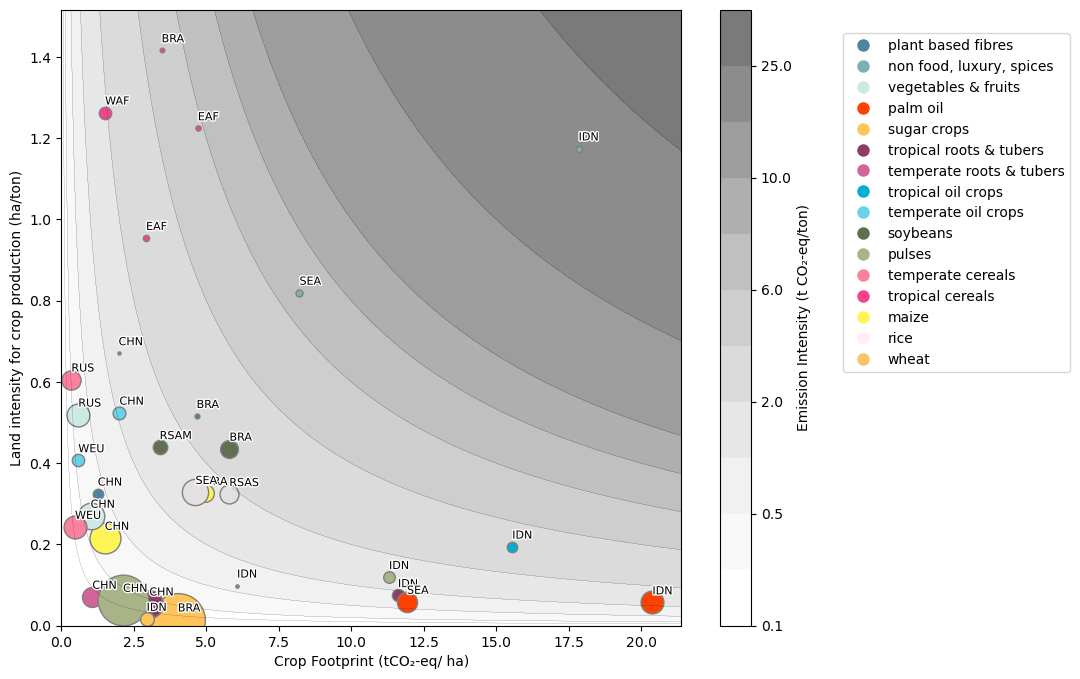

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches

plt.figure(figsize=(25, 10), dpi=400)

crop_footprint = carbon_footprint_array
crop_footprint_selected = carbon_footprint_array_selected

yields = df2_array.flatten()
yields_selected = df2_array_selected.flatten()

land_effeciency = 1 / yields
land_effeciency_selected = 1 / yields_selected

n_points = 100
carbon_footprint_contour = np.linspace(0, np.max(crop_footprint_selected) + 1, n_points)
df2_contour = np.linspace(0, np.max(land_effeciency_selected) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour, df2_contour)
Z = X * Y  # z = total emissions / yield = emissions per hectare

# Plot
plt.figure(figsize=(10, 8))
class_ranges = [0.1, 0.2, 0.5, 1, 2, 4, 6, 8, 10, 15, 25, 40]

# Create a sliced colormap
base_cmap = plt.cm.Greys
colors = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors)

# Normalize levels for even distribution
norm = BoundaryNorm(class_ranges, ncolors=custom_cmap.N, clip=True)

contour = plt.contourf(X, Y, Z, levels=class_ranges,cmap=custom_cmap, norm=norm, edgecolors='Black')
cbar = plt.colorbar(contour)
cbar.set_label('Emission Intensity (t CO₂-eq/ton)')
contour_lines = plt.contour(X, Y, Z, levels=class_ranges, colors='black', linewidths=0.1)

# cbar.set_label('Emissions per Hectare (t CO₂-eq/ha)')

# Add labels and title
plt.xlabel('Crop Footprint (tCO₂-eq/ ha)')
plt.ylabel('Land intensity for crop production (ha/ton)')

# plt.scatter(crop_footprint, land_effeciency, color='grey', edgecolor='black', label='others')

for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['colors'].to_list(), df2_colour['NewColumn'].to_list())):
    sizes = df_norm_selected_test[x] * 40
    plt.scatter(crop_footprint_selected[x], land_effeciency_selected[x], color=data[1], edgecolors='grey', label=data[0], s=sizes)
    
    # if x == 13:  # Exception for row 12
    #     verticalalignment = 'bottom'  # Different alignment for row 12
    #     print(f"Applying 'bottom' alignment for index 12")
    # else:
    #     verticalalignment = 'top'  # Default alignment for others

    text = plt.text(crop_footprint_selected[x], land_effeciency_selected[x] + 0.02, data[2], fontsize=8, color='black')
        
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

from matplotlib.lines import Line2D
colors = ['#4D869C', '#7AB2B2', '#CDE8E5', '#FC4100', 
           '#FFC55A', '#8E3E63', '#D2649A', '#03AED2', 
           '#68D2E8', '#5F6F52', '#A9B388', '#FC819E', '#F7418F', '#FFF455', '#FFEFEF', 
          '#F7C566']
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]

# plt.text(20, 5, data[0], fontsize=8, color=data[1], verticalalignment='center')
# Add the legend with the circle markers
columns2 = ['plant based fibres','non food, luxury, spices','vegetables & fruits','palm oil',
             'sugar crops','tropical roots & tubers','temperate roots & tubers','tropical oil crops',
             'temperate oil crops','soybeans','pulses','temperate cereals','tropical cereals','maize','rice',
            'wheat']
plt.legend(legend_handles, columns2, loc='lower left', bbox_to_anchor=(1.25, 0.4), ncol=1)

plt.show()

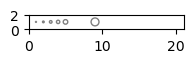

In [121]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Sample data
x = [1, 2, 3, 4, 5, 9]
y = [1, 1, 1, 1, 1, 1]
size_values = [30, 103, 242,
               404, 740, 2248]  # Sizes in points^2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(2, 2))

# Plot scatter
# scatter = ax.scatter(x, y, s=size_values, color='blue', alpha=0.5)

# Add circles with synchronized sizes
for i, size in enumerate(size_values):
    # Calculate radius from area (size in points^2)
    radius = np.sqrt(size / np.pi) * 0.02  # Adjust scaling factor as needed
    circle = patches.Circle((x[i], y[i]), radius=radius, facecolor='white', edgecolor='black',alpha=0.5)
    ax.add_patch(circle)

# # Set limits
ax.set_xlim(0, 21)
ax.set_ylim(0, 2)
ax.set_aspect('equal')  # Keep aspect ratio equal

plt.show()

In [122]:
import pandas as pd
df_GECO2AB_crop_CH4 = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/GECO2AB_crop_category_CH4_13Jan.xlsx")
df_GECO2AB_crop_N2O = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/GECO2AB_crop_category_N2O_13Jan.xlsx")
ccode_iso = pd.read_excel("Z:/achaidir/Country Grids/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")

In [123]:
df_GECO2AB_crop_CH4_merge = pd.merge(left=ccode_iso, right=df_GECO2AB_crop_CH4, how="left", left_on="ISO Country", right_on="country_name")
df_GECO2AB_crop_CH4_columns = df_GECO2AB_crop_CH4_merge[[ 'IMAGE Region Name', 'type', 'emissions',               1975,
                      1980,                1985,                1990,
                      1995,                2000,                2005,
                      2010,                2015,                2020]]
df_GECO2AB_crop_CH4_columns_groupby = df_GECO2AB_crop_CH4_columns.groupby(['type', 'IMAGE Region Name']).sum()
df_GECO2AB_crop_CH4_columns_groupby_reset = df_GECO2AB_crop_CH4_columns_groupby.reset_index()
# df_GECO2AB_crop_CH4_columns_groupby_drop = df_GECO2AB_crop_CH4_columns_groupby_reset.drop(columns=['emissions'])
df_GECO2AB_crop_CH4_columns_groupby_reset.insert(df_GECO2AB_crop_CH4_columns_groupby_reset.columns.get_loc("type") + 1, "emissions", "agri_burn_CH4")
#df_GECO2AB_crop_CH4_columns_groupby_reset.loc[:, range(1975, 2025, 5)] = (df_GECO2AB_crop_CH4_columns_groupby_reset[range(1975, 2025, 5)].values* 28) /5
# df_GECO2AB_crop_CH4_columns_groupby_reset.to_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri_burn_CH4_crop_category_annual_gtco2eq_13Jan.xlsx", index=False)

df_GECO2AB_crop_CH4_columns_groupby_reset.loc[:, range(1975, 2025, 5)] = (df_GECO2AB_crop_CH4_columns_groupby_reset[range(1975, 2025, 5)].values* 28) /25
#df_GECO2AB_crop_CH4_columns_groupby_reset.to_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri_burn_CH4_crop_category_annual_gtco2eq_13Jan_25.xlsx", index=False)

df_GECO2AB_crop_N2O_merge = pd.merge(left=ccode_iso, right=df_GECO2AB_crop_N2O, how="left", left_on="ISO Country", right_on="country_name")
df_GECO2AB_crop_N2O_columns = df_GECO2AB_crop_N2O_merge[[ 'IMAGE Region Name', 'type', 'emissions',               1975,
                      1980,                1985,                1990,
                      1995,                2000,                2005,
                      2010,                2015,                2020]]
df_GECO2AB_crop_N2O_columns_groupby = df_GECO2AB_crop_N2O_columns.groupby(['type', 'IMAGE Region Name']).sum()
df_GECO2AB_crop_N2O_columns_groupby_reset = df_GECO2AB_crop_N2O_columns_groupby.reset_index()
# df_GECO2AB_crop_N2O_columns_groupby_drop = df_GECO2AB_crop_N2O_columns_groupby_reset.drop(columns=['emissions'])
df_GECO2AB_crop_N2O_columns_groupby_reset.insert(df_GECO2AB_crop_N2O_columns_groupby_reset.columns.get_loc("type") + 1, "emissions", "agri_burn_N2O")
# df_GECO2AB_crop_N2O_columns_groupby_reset.loc[:, range(1975, 2025, 5)] = (df_GECO2AB_crop_N2O_columns_groupby_reset[range(1975, 2025, 5)].values* 265) /5
# df_GECO2AB_crop_N2O_columns_groupby_reset.to_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri_burn_N2O_crop_category_annual_gtco2eq_13Jan.xlsx", index=False)

df_GECO2AB_crop_N2O_columns_groupby_reset.loc[:, range(1975, 2025, 5)] = (df_GECO2AB_crop_N2O_columns_groupby_reset[range(1975, 2025, 5)].values* 265) /25
#df_GECO2AB_crop_N2O_columns_groupby_reset.to_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri_burn_N2O_crop_category_annual_gtco2eq_13Jan_25.xlsx", index=False)



C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\1342896711.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_GECO2AB_crop_CH4_columns_groupby = df_GECO2AB_crop_CH4_columns.groupby(['type', 'IMAGE Region Name']).sum()
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\1342896711.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_GECO2AB_crop_N2O_columns_groupby = df_GECO2AB_crop_N2O_columns.groupby(['type', 'IMAGE Region Name']).sum()


In [124]:
ccode_iso = pd.read_excel("Z:/achaidir/Country Grids/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")

df_LUC_agri = pd.read_excel("X:/cadlan/stream_2/Step4/Country Level/AM1/luc_crop_per_crops_AM1.xlsx")
df_LUC_agri_merge = pd.merge(left=ccode_iso, right=df_LUC_agri, how="left", left_on="ISO Country", right_on="country_name")
df_LUC_agri_columns = df_LUC_agri_merge[[ 'IMAGE Region Name', 'type',               1975,
                      1980,                1985,                1990,
                      1995,                2000,                2005,
                      2010,                2015,                2020]]
df_LUC_agri_columns_groupby = df_LUC_agri_columns.groupby(['type', 'IMAGE Region Name']).sum()
df_LUC_agri_columns_groupby_reset = df_LUC_agri_columns_groupby.reset_index()
df_LUC_agri_columns_groupby_reset.insert(df_LUC_agri_columns_groupby_reset.columns.get_loc("type") + 1, "emissions", "LUC_Agri")
df_LUC_agri_columns_groupby_reset.loc[:, range(1975, 2025, 5)] = (df_LUC_agri_columns_groupby_reset[range(1975, 2025, 5)].values /5)
#df_LUC_agri_columns_groupby_reset.to_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/LUC_agri_crop_category_annual_gtco2eq.xlsx", index=False)

ccode_iso = pd.read_excel("Z:/achaidir/Country Grids/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")

df_agri2agri = pd.read_excel("X:/cadlan/stream_2/Step4/Country Level/AM1/agri_to_agri_per_crops_AM1.xlsx")
df_agri2agri_merge = pd.merge(left=ccode_iso, right=df_agri2agri, how="left", left_on="ISO Country", right_on="country_name")
df_agri2agri_columns = df_agri2agri_merge[[ 'IMAGE Region Name', 'type',               1975,
                      1980,                1985,                1990,
                      1995,                2000,                2005,
                      2010,                2015,                2020]]
df_agri2agri_columns_groupby = df_agri2agri_columns.groupby(['type', 'IMAGE Region Name']).sum()
df_agri2agri_columns_groupby_reset = df_agri2agri_columns_groupby.reset_index()
df_agri2agri_columns_groupby_reset.insert(df_agri2agri_columns_groupby_reset.columns.get_loc("type") + 1, "emissions", "agri2agri")
df_agri2agri_columns_groupby_reset.loc[:, range(1975, 2025, 5)] = (df_agri2agri_columns_groupby_reset[range(1975, 2025, 5)].values /5)
#df_agri2agri_columns_groupby_reset.to_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri2agri_crop_category_annual_gtco2eq.xlsx", index=False)

In [125]:
GECH4RI = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GECH4RI_rice_category_annual_gtco2eq.xlsx")
# GECO2AB = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GECO2AB_crop_category_annual_gtco2eq.xlsx")
GECO2AB_CH4 = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri_burn_CH4_crop_category_annual_gtco2eq_13Jan_25.xlsx")
GECO2AB_N2O = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri_burn_N2O_crop_category_annual_gtco2eq_13Jan_25.xlsx")
GEC2OLC = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GEN2OLC_crop_category_annual_gtco2eq.xlsx")
GEN2ORE = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GEN2ORE_crop_category_annual_gtco2eq_13Jan.xlsx")
GFERTYN = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GFERTSYN_crop_category_annual_gtco2eq.xlsx")
GMANURE = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/GMANURE_crop_category_annual_gtco2eq.xlsx")
# LUC_total = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/LUC_total_crop_category_annual_gtco2eq.xlsx")
LUC_agri = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/LUC_agri_crop_category_annual_gtco2eq.xlsx")
agri_to_agri = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/agri2agri_crop_category_annual_gtco2eq.xlsx")

peat_CH4 = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/peat_CH4_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_CO2 = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/peat_CO2_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_DOC = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/peat_DOC_crop_category_annual_gtco2eq_v2_13Jan.xlsx")
peat_N2O = pd.read_excel("Z:/achaidir/IMAGE PBL/SSP2/grid_emissions/percrops/country-crops-emission category/annual_gtco2eq/peat_N2O_crop_category_annual_gtco2eq_v2_13Jan.xlsx")

GECH4RI['type'] = GECH4RI['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
#GECO2AB['type'] = GECO2AB['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
GECO2AB_CH4['type'] = GECO2AB_CH4['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
GECO2AB_N2O['type'] = GECO2AB_N2O['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
GEC2OLC['type'] = GEC2OLC['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
GEN2ORE['type'] = GEN2ORE['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
GFERTYN['type'] = GFERTYN['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
GMANURE['type'] = GMANURE['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
#LUC_total['type'] = LUC_total['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')

LUC_agri['type'] = LUC_agri['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
agri_to_agri['type'] = agri_to_agri['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')


peat_CH4['type'] = peat_CH4['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
peat_CO2['type'] = peat_CO2['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
peat_DOC['type'] = peat_DOC['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
peat_N2O['type'] = peat_N2O['type'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')

In [126]:
df_agrim_combined = pd.concat([GECH4RI, GFERTYN, GMANURE, peat_CH4, peat_CO2, peat_DOC, peat_N2O], ignore_index=True)
df_agrim_groupby = df_agrim_combined.groupby(['IMAGE Region Name', 'type']).sum()
df_agrim = df_agrim_groupby.reset_index()
df_agrim.loc[:, range(1975, 2025, 5)] = (df_agrim[range(1975, 2025, 5)].values * 5)

df_agrim_melt = df_agrim.melt(id_vars=['IMAGE Region Name', 'type'], var_name='time', value_name='value')
df_agrim_melt = df_agrim_melt.drop(columns=['time'])
df_agrim_groupby = df_agrim_melt.groupby(['IMAGE Region Name', 'type']).sum()
df_agrim_index = df_agrim_groupby.reset_index()
df_agrim_index.loc[:, 'emissions'] = "AGRI"
df_agrim_index

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\3384758571.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrim_groupby = df_agrim_combined.groupby(['IMAGE Region Name', 'type']).sum()


,IMAGE Region Name,type,value,emissions
0,Brazil,maize,0.102378,AGRI
1,Brazil,"non food, luxury, spices",0.030525,AGRI
2,Brazil,palm oil,0.001157,AGRI
3,Brazil,pasture,0.000000,AGRI
4,Brazil,plant based fibres,0.009021,AGRI
...,...,...,...,...
437,W. Europe,tropical cereals,0.003295,AGRI
438,W. Europe,tropical oil crops,0.000031,AGRI
439,W. Europe,tropical roots & tubers,0.000092,AGRI
440,W. Europe,vegetables & fruits,0.111655,AGRI


In [127]:
LUC_combined = pd.concat([LUC_agri, agri_to_agri, GEC2OLC ], ignore_index=True)

LUC_groupby = LUC_combined.groupby(['IMAGE Region Name', 'type']).sum() #mean
df_LUC = LUC_groupby.reset_index()
df_LUC.loc[:, range(1975, 2025, 5)] = (df_LUC[range(1975, 2025, 5)].values * 5)
df_LUC_melt = df_LUC.melt(id_vars=['IMAGE Region Name', 'type'], var_name='time', value_name='value')
df_LUC_melt = df_LUC_melt.drop(columns=['time'])
df_LUC_groupby = df_LUC_melt.groupby(['IMAGE Region Name', 'type']).sum()
df_LUC_index = df_LUC_groupby.reset_index()
df_LUC_index.loc[:, 'emissions'] = "LUC"
df_LUC_index

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\4228756280.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LUC_groupby = LUC_combined.groupby(['IMAGE Region Name', 'type']).sum() #mean


,IMAGE Region Name,type,value,emissions
0,Brazil,maize,3.538637,LUC
1,Brazil,"non food, luxury, spices",0.727120,LUC
2,Brazil,palm oil,0.021710,LUC
3,Brazil,pasture,25.267104,LUC
4,Brazil,plant based fibres,0.588443,LUC
...,...,...,...,...
437,W. Europe,tropical cereals,0.004936,LUC
438,W. Europe,tropical oil crops,0.000030,LUC
439,W. Europe,tropical roots & tubers,0.000016,LUC
440,W. Europe,vegetables & fruits,0.015865,LUC


In [128]:
data_2kategori = pd.concat([df_agrim_index, df_LUC_index], ignore_index=True)
data_2kategori

,IMAGE Region Name,type,value,emissions
0,Brazil,maize,0.102378,AGRI
1,Brazil,"non food, luxury, spices",0.030525,AGRI
2,Brazil,palm oil,0.001157,AGRI
3,Brazil,pasture,0.000000,AGRI
4,Brazil,plant based fibres,0.009021,AGRI
...,...,...,...,...
879,W. Europe,tropical cereals,0.004936,LUC
880,W. Europe,tropical oil crops,0.000030,LUC
881,W. Europe,tropical roots & tubers,0.000016,LUC
882,W. Europe,vegetables & fruits,0.015865,LUC


In [129]:
country_code = pd.read_excel("Z:/achaidir/Country Grids/ISO-3166-Country-Code_Final.xlsx", engine="openpyxl")
# Create a dictionary mapping IMAGE Region Name to Country Code
region_code_map = country_code.set_index('IMAGE Region Name')['IMAGE Region Code'].to_dict()
region_code_map

{'W. Europe': 'WEU',
 'Rest S. Asia': 'RSAS',
 'C. Europe': 'CEU',
 'N. Africa': 'NAF',
 'Oceania': 'OCE',
 'Rest S. Africa': 'RSAF',
 'Rest C. America': 'RCAM',
 'Rest S. America': 'RSAM',
 'Russia': 'RUS',
 'Middle East': 'ME',
 'Ukraine region': 'UKR',
 'W. Africa': 'WAF',
 nan: nan,
 'Brazil': 'BRA',
 'SE. Asia': 'SEAS',
 'E. Africa': 'EAF',
 'Canada': 'CAN',
 'China': 'CHN',
 'India': 'INDIA',
 'Indonesia': 'INDO',
 'Japan': 'JAP',
 'Kazakhstan region': 'STAN',
 'Korea': 'KOR',
 'Mexico': 'MEX',
 'USA': 'USA',
 'South Africa': 'SAF',
 'Turkey': 'TUR'}

In [130]:
two_plots = data_2kategori[
    (data_2kategori['IMAGE Region Name'] == "Brazil") & (data_2kategori['type'] == "soybeans") 
  | (data_2kategori['IMAGE Region Name'] == "China") & (data_2kategori['type'] == "maize") 
  | (data_2kategori['IMAGE Region Name'] == "Indonesia") & (data_2kategori['type'] == "palm oil") 
  | (data_2kategori['IMAGE Region Name'] == "SE. Asia") & (data_2kategori['type'] == "rice") 
  | (data_2kategori['IMAGE Region Name'] == "W. Africa") & (data_2kategori['type'] == "tropical cereals")]
two_plots

,IMAGE Region Name,type,value,emissions
7,Brazil,soybeans,0.152344,AGRI
51,China,maize,1.238923,AGRI
104,Indonesia,palm oil,1.631959,AGRI
329,SE. Asia,rice,5.089537,AGRI
420,W. Africa,tropical cereals,0.024981,AGRI
449,Brazil,soybeans,4.185095,LUC
493,China,maize,0.528135,LUC
546,Indonesia,palm oil,2.477294,LUC
771,SE. Asia,rice,1.576025,LUC
862,W. Africa,tropical cereals,2.063059,LUC


In [131]:
total_emissions = two_plots.groupby(['IMAGE Region Name', 'type'])['value'].sum().reset_index()
total_emissions.columns = ['IMAGE Region Name', 'type', 'total_akumulatif']
two_plots = two_plots.merge(total_emissions, on=['IMAGE Region Name', 'type'])
two_plots['percentage'] = (two_plots['value'] / two_plots['total_akumulatif']) * 100
two_plots

,IMAGE Region Name,type,value,emissions,total_akumulatif,percentage
0,Brazil,soybeans,0.152344,AGRI,4.337439,3.512309
1,Brazil,soybeans,4.185095,LUC,4.337439,96.487691
2,China,maize,1.238923,AGRI,1.767059,70.112189
3,China,maize,0.528135,LUC,1.767059,29.887811
4,Indonesia,palm oil,1.631959,AGRI,4.109253,39.714244
5,Indonesia,palm oil,2.477294,LUC,4.109253,60.285756
6,SE. Asia,rice,5.089537,AGRI,6.665562,76.355709
7,SE. Asia,rice,1.576025,LUC,6.665562,23.644291
8,W. Africa,tropical cereals,0.024981,AGRI,2.088040,1.196384
9,W. Africa,tropical cereals,2.063059,LUC,2.088040,98.803616


In [132]:
two_plots_pivot_df = two_plots.pivot_table(index=['IMAGE Region Name', 'type'], columns='emissions', values='percentage', fill_value=0).reset_index()
two_plots_pivot_df = two_plots_pivot_df.reset_index()
two_plots_pivot_df 

emissions,index,IMAGE Region Name,type,AGRI,LUC
0,0,Brazil,soybeans,3.512309,96.487691
1,1,China,maize,70.112189,29.887811
2,2,Indonesia,palm oil,39.714244,60.285756
3,3,SE. Asia,rice,76.355709,23.644291
4,4,W. Africa,tropical cereals,1.196384,98.803616


In [133]:
two_plots_pivot_df_arr = two_plots_pivot_df[two_plots_pivot_df.columns[3:5]].to_numpy()
two_plots_pivot_df_arr

array([[ 3.51230942, 96.48769058],
       [70.11218936, 29.88781064],
       [39.71424421, 60.28575579],
       [76.3557089 , 23.6442911 ],
       [ 1.19638354, 98.80361646]])

C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\2373618383.py:21: RuntimeWarning: divide by zero encountered in divide
  land_effeciency = 1 / yields
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\2373618383.py:42: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')


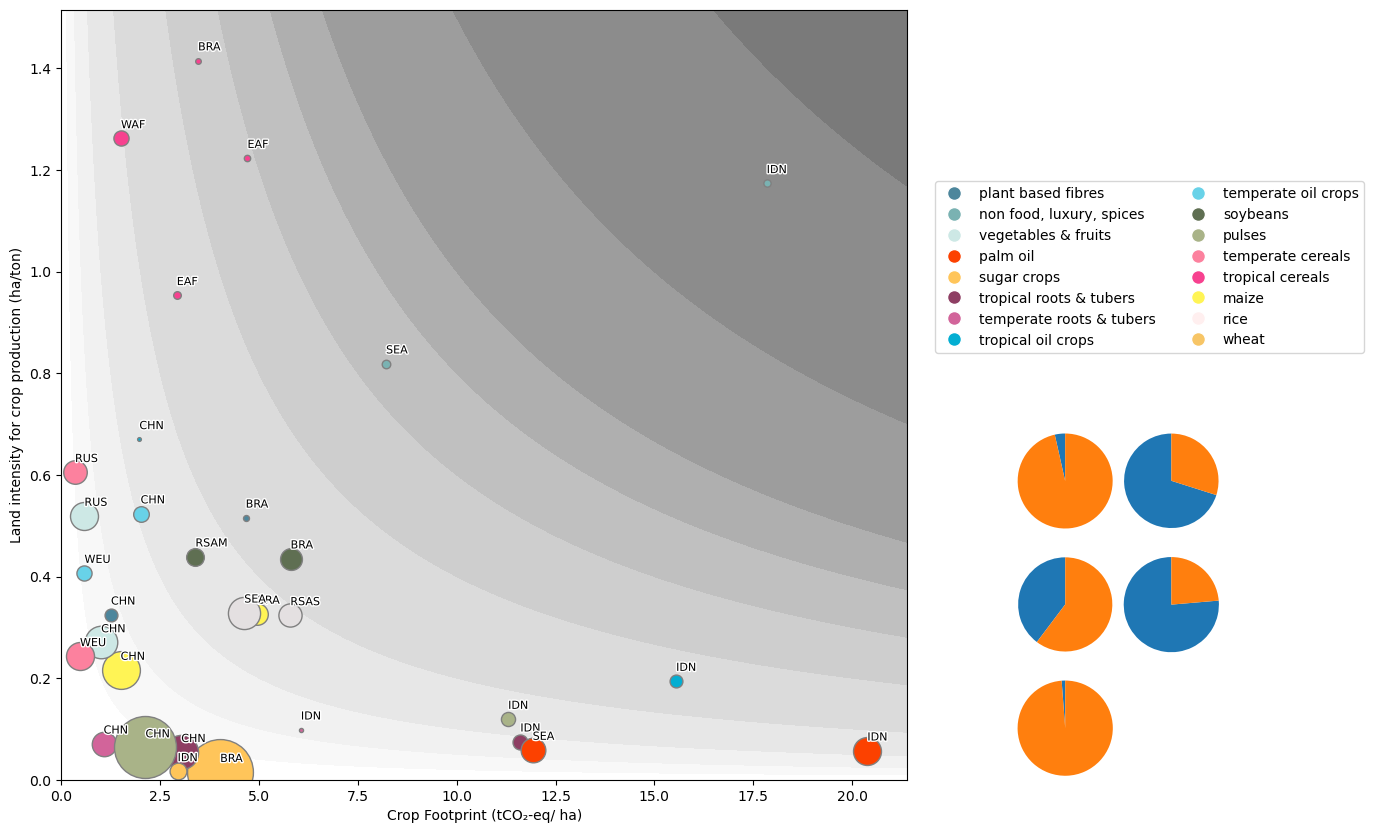

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from matplotlib import gridspec
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.2, wspace=0.2, width_ratios=[8,2], height_ratios=[5,5])


countour_plot = fig.add_subplot(gs[:, 0])

# Assuming carbon_footprint_array and df2_array are defined
crop_footprint = carbon_footprint_array
crop_footprint_selected = carbon_footprint_array_selected

yields = df2_array.flatten()
yields_selected = df2_array_selected.flatten()

land_effeciency = 1 / yields
land_effeciency_selected = 1 / yields_selected

n_points = 100
carbon_footprint_contour = np.linspace(0, np.max(crop_footprint_selected) + 1, n_points)
df2_contour = np.linspace(0, np.max(land_effeciency_selected) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour, df2_contour)
Z = X * Y  # z = total emissions / yield = emissions per hectare

# Plotting the contour
class_ranges = [0.1, 0.2, 0.5, 1, 2, 4, 6, 8, 10, 15, 25, 40]

# Create a sliced colormap
base_cmap = plt.cm.Greys
colors = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors)

# Normalize levels for even distribution
norm = BoundaryNorm(class_ranges, ncolors=custom_cmap.N, clip=True)

contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')
# cbar = plt.colorbar(contour, ax=countour_plot)
# cbar.set_label('Emission Intensity (t CO₂-eq/ton)')
# contour_lines = countour_plot.contour(X, Y, Z, levels=class_ranges, colors='black', linewidths=0.1)

# Add labels and title
countour_plot.set_xlabel('Crop Footprint (tCO₂-eq/ ha)')
countour_plot.set_ylabel('Land intensity for crop production (ha/ton)')

# Scatter plot for selected data points
for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['colors'].to_list(), df2_colour['NewColumn'].to_list())):
    sizes = df_norm_selected_test[x] * 60
    countour_plot.scatter(crop_footprint_selected[x], land_effeciency_selected[x], color=data[1], edgecolors='grey', label=data[0], s=sizes)
    
    text = countour_plot.text(crop_footprint_selected[x], land_effeciency_selected[x] + 0.02, data[2], fontsize=8, color='black')
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

# Menambahkan legend ke kuadran kanan atas
legend_ax = fig.add_subplot(gs[0, 1])
legend_ax.axis('off')  # Sembunyikan sumbu
legend_ax.legend(legend_handles, columns2, loc='lower left', bbox_to_anchor=(-0.4,0), ncol=2)

# Create a new GridSpec for the pie charts within gs[1, 1]
gs_pie = gridspec.GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[1, 1], wspace=0.01)

# Loop through each row in the data to create pie charts
for i, row in enumerate(two_plots_pivot_df_arr):
    # Create a new axes for each pie chart within the new grid
    ax_piechart = fig.add_subplot(gs_pie[i // 2, i % 2])   # 1 row, 2 columns
    wedges, texts = ax_piechart.pie(
        row, 
        # labels=[f'Segment {j+1}' for j in range(len(row))],  # Label segments
        # autopct='%1.1f%%',  # Show percentage
        startangle=90,  # Start angle for the pie chart
        colors=plt.cm.tab10.colors,  # Use a colormap for colors
    )
    # ax_piechart.set_title(f'Pie Chart {i + 1}')
    ax_piechart.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

In [135]:
for i, row in enumerate(two_plots_pivot_df_arr):
    print(row)

[ 3.51230942 96.48769058]
[70.11218936 29.88781064]
[39.71424421 60.28575579]
[76.3557089 23.6442911]
[ 1.19638354 98.80361646]


In [136]:
five_top_data = data_2kategori[
    (data_2kategori['IMAGE Region Name'] == "Brazil") & (data_2kategori['type'] == "soybeans") 
  | (data_2kategori['IMAGE Region Name'] == "Indonesia") & (data_2kategori['type'] == "palm oil") 
  | (data_2kategori['IMAGE Region Name'] == "SE. Asia") & (data_2kategori['type'] == "rice") 
  | (data_2kategori['IMAGE Region Name'] == "W. Africa") & (data_2kategori['type'] == "tropical cereals") 
                                      
]
total_emissions = five_top_data.groupby(['IMAGE Region Name', 'type'])['value'].sum().reset_index()
total_emissions.columns = ['IMAGE Region Name', 'type', 'total_akumulatif']
five_top_data = five_top_data.merge(total_emissions, on=['IMAGE Region Name', 'type'])
five_top_data['percentage'] = (five_top_data['value'] / five_top_data['total_akumulatif']) * 100
pivot_df = five_top_data.pivot_table(index=['IMAGE Region Name', 'type'], columns='emissions', values='percentage', fill_value=0)
bar_width = 0.6 
pivot_df

,emissions,AGRI,LUC
IMAGE Region Name,type,,
Brazil,soybeans,3.512309,96.487691
Indonesia,palm oil,39.714244,60.285756
SE. Asia,rice,76.355709,23.644291
W. Africa,tropical cereals,1.196384,98.803616


C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\3094920069.py:21: RuntimeWarning: divide by zero encountered in divide
  land_effeciency = 1 / yields
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\3094920069.py:42: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')
C:\Users\Achaidir\AppData\Local\Temp\ipykernel_22752\3094920069.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


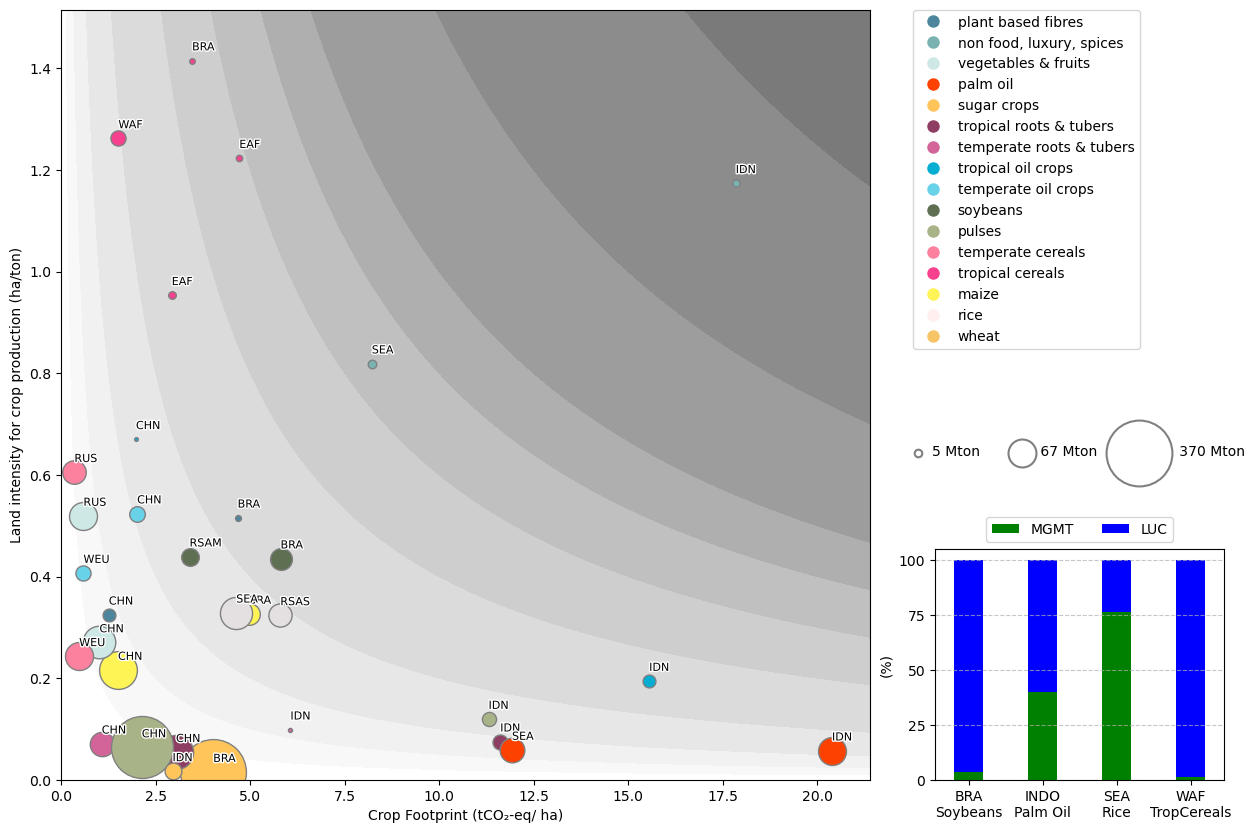

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from matplotlib import gridspec
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.001, wspace=0.01, width_ratios=[7,0.5,2.5], height_ratios=[5,2,3])


countour_plot = fig.add_subplot(gs[:, :1])

# Assuming carbon_footprint_array and df2_array are defined
crop_footprint = carbon_footprint_array
crop_footprint_selected = carbon_footprint_array_selected

yields = df2_array.flatten()
yields_selected = df2_array_selected.flatten()

land_effeciency = 1 / yields
land_effeciency_selected = 1 / yields_selected

n_points = 100
carbon_footprint_contour = np.linspace(0, np.max(crop_footprint_selected) + 1, n_points)
df2_contour = np.linspace(0, np.max(land_effeciency_selected) + 0.1, n_points)

X, Y = np.meshgrid(carbon_footprint_contour, df2_contour)
Z = X * Y  # z = total emissions / yield = emissions per hectare

# Plotting the contour
class_ranges = [0.1, 0.2, 0.5, 1, 2, 4, 6, 8, 10, 15, 25, 40]

# Create a sliced colormap
base_cmap = plt.cm.Greys
colors = base_cmap(np.linspace(0.0, 0.6, base_cmap.N))  # Slice to avoid pure white or black
custom_cmap = LinearSegmentedColormap.from_list("custom_greys", colors)

# Normalize levels for even distribution
norm = BoundaryNorm(class_ranges, ncolors=custom_cmap.N, clip=True)

contour = countour_plot.contourf(X, Y, Z, levels=class_ranges, cmap=custom_cmap, norm=norm, edgecolors='Black')
# cbar = plt.colorbar(contour, ax=countour_plot)
# cbar.set_label('Emission Intensity (t CO₂-eq/ton)')
# contour_lines = countour_plot.contour(X, Y, Z, levels=class_ranges, colors='black', linewidths=0.1)

# Add labels and title
countour_plot.set_xlabel('Crop Footprint (tCO₂-eq/ ha)')
countour_plot.set_ylabel('Land intensity for crop production (ha/ton)')
countour_plot.axis('on')

# Scatter plot for selected data points
for x, data in enumerate(zip(df2_colour['IMAGE Classification Region'].to_list(), df2_colour['colors'].to_list(), df2_colour['NewColumn'].to_list())):
    sizes = df_norm_selected_test[x] * 60
    countour_plot.scatter(crop_footprint_selected[x], land_effeciency_selected[x], color=data[1], edgecolors='grey', label=data[0], s=sizes)
    
    text = countour_plot.text(crop_footprint_selected[x], land_effeciency_selected[x] + 0.02, data[2], fontsize=8, color='black')
    text.set_path_effects([path_effects.withStroke(linewidth=2, foreground="white")])

# Menambahkan legend ke kuadran kanan atas
legend_ax = fig.add_subplot(gs[0, 2])
legend_ax.axis('off')  # Sembunyikan sumbu
legend_ax.legend(legend_handles, columns2, loc='lower left', bbox_to_anchor=(-0.10,0.1), ncol=1)

size_ax = fig.add_subplot(gs[1,2]) 
size_labels = ['5 Mton', ' 67 Mton','      370 Mton']
size_values = [30, 404.84181766, 2248.3112172]
for size, label in zip(size_values, size_labels):
    size_ax.scatter([], [], s=size, facecolor='white', edgecolor='grey', linewidth=1.5, label=label)  # Empty scatter for legend
size_ax.legend(loc='lower left', bbox_to_anchor=(-0.15,0.5), ncol=3, handletextpad=0, labelspacing=0, frameon=False)
size_ax.axis('off')  # Turn off the axis

ax_barchart = fig.add_subplot(gs[2, 2])
custom_labels = [
    "BRA\nSoybeans",
    "INDO\nPalm Oil",
    "SEA\nRice",
    "WAF\nTropCereals"]

pivot_df.plot(kind='bar', stacked=True, ax=ax_barchart, color=['green', 'blue',], legend=False, width=0.4)

import matplotlib.ticker as ticker
ax_barchart.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax_barchart.set_xticks(range(len(custom_labels)))
ax_barchart.set_xticklabels(custom_labels, rotation=0)
ax_barchart.set_ylabel('(%)', fontsize=10)
ax_barchart.grid(axis='y', linestyle='--', alpha=0.7)
ax_barchart.tick_params(axis='y', labelsize=10)
ax_barchart.set_xlabel("")

bar_legend = ax_barchart.legend( ['MGMT', 'LUC'],
    bbox_to_anchor=(0.5, 1),  # Centered below the plot
    loc='lower center', 
    ncol=2,  # Two columns
    title_fontsize=12,
    fontsize=10
)

plt.tight_layout()
plt.show()